In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv("C:\\Users\\Krishna Patel\\Downloads\\Maternal Health Risk Data Set.csv")
raw_data = pd.DataFrame(raw_data)
print(raw_data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [3]:
raw_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [4]:
raw_data.rename(columns={'SystolicBP': 'upper_blood_pressure', 'DiastolicBP': 'lower_blood_pressure', 'BS' : 'blood_sugar'}, inplace=True)

In [5]:
print(raw_data.head())

   Age  upper_blood_pressure  lower_blood_pressure  blood_sugar  BodyTemp  \
0   25                   130                    80         15.0      98.0   
1   35                   140                    90         13.0      98.0   
2   29                    90                    70          8.0     100.0   
3   30                   140                    85          7.0      98.0   
4   35                   120                    60          6.1      98.0   

   HeartRate  RiskLevel  
0         86  high risk  
1         70  high risk  
2         80  high risk  
3         70  high risk  
4         76   low risk  


In [6]:
missing_values = raw_data.isnull().sum()
missing_values

Age                     0
upper_blood_pressure    0
lower_blood_pressure    0
blood_sugar             0
BodyTemp                0
HeartRate               0
RiskLevel               0
dtype: int64

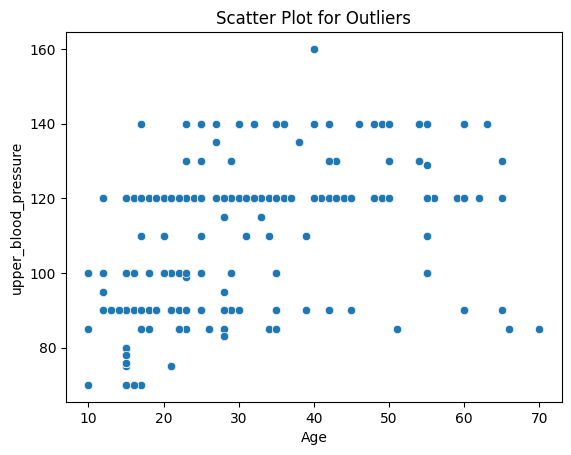

In [7]:
sns.scatterplot(x=raw_data['Age'], y=raw_data['upper_blood_pressure'])
plt.title('Scatter Plot for Outliers')
plt.show()

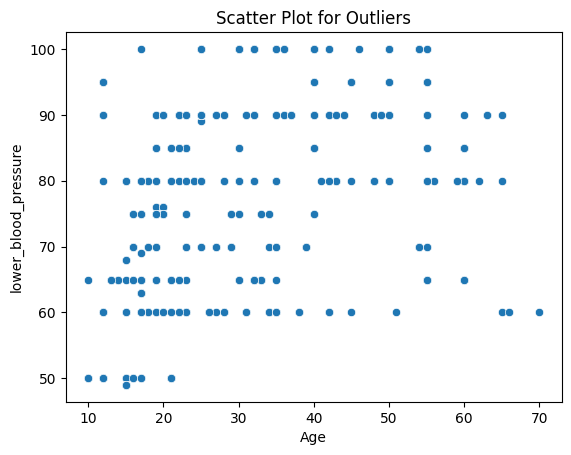

In [8]:
sns.scatterplot(x=raw_data['Age'], y=raw_data['lower_blood_pressure'])
plt.title('Scatter Plot for Outliers')
plt.show()

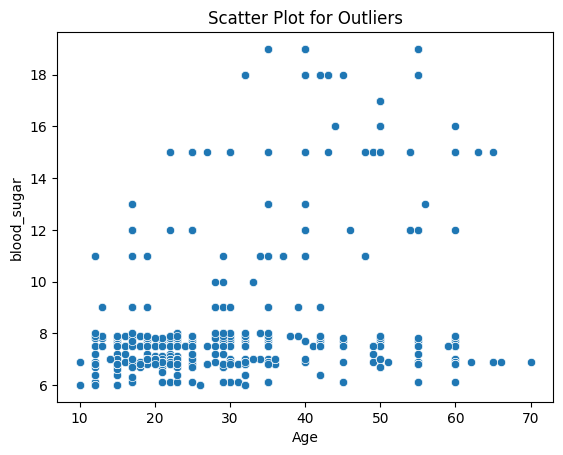

In [9]:
sns.scatterplot(x=raw_data['Age'], y=raw_data['blood_sugar'])
plt.title('Scatter Plot for Outliers')
plt.show()

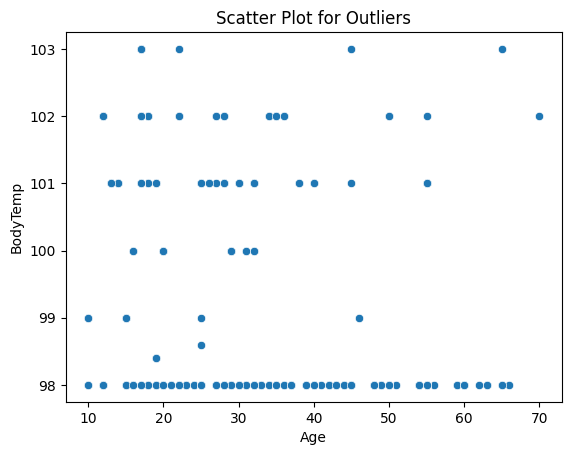

In [10]:
sns.scatterplot(x=raw_data['Age'], y=raw_data['BodyTemp'])
plt.title('Scatter Plot for Outliers')
plt.show()

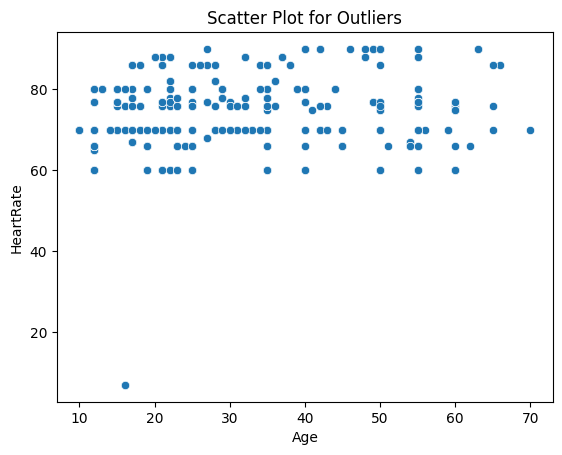

In [11]:
sns.scatterplot(x=raw_data['Age'], y=raw_data['HeartRate'])
plt.title('Scatter Plot for Outliers')
plt.show()

In [12]:
heartrate_mean = raw_data["HeartRate"].sum() / raw_data["HeartRate"].count()
raw_data["heartrate_std_dev"] = (( raw_data["HeartRate"] - heartrate_mean ) ** 2 / raw_data["HeartRate"].count() ) ** 0.5
raw_data["heartrate_zscore"] = ( raw_data["HeartRate"] - heartrate_mean ) / raw_data["heartrate_std_dev"]

In [13]:
print(raw_data["heartrate_zscore"])

0       31.843367
1      -31.843367
2       31.843367
3      -31.843367
4       31.843367
          ...    
1009    31.843367
1010   -31.843367
1011    31.843367
1012   -31.843367
1013    31.843367
Name: heartrate_zscore, Length: 1014, dtype: float64


In [14]:
upperbloodpressure_mean = raw_data["upper_blood_pressure"].sum() / raw_data["upper_blood_pressure"].count()
raw_data["upperbloodpressure_std_dev"] = (( raw_data["upper_blood_pressure"] - upperbloodpressure_mean ) ** 2 / raw_data["upper_blood_pressure"].count() ) ** 0.5
raw_data["upparbloodpressure_zscore"] = ( raw_data["upper_blood_pressure"] - upperbloodpressure_mean ) / raw_data["upperbloodpressure_std_dev"]

In [15]:
print(raw_data["upparbloodpressure_zscore"])

0       31.843367
1       31.843367
2      -31.843367
3       31.843367
4       31.843367
          ...    
1009    31.843367
1010    31.843367
1011   -31.843367
1012    31.843367
1013    31.843367
Name: upparbloodpressure_zscore, Length: 1014, dtype: float64


In [16]:
no_outlier_data = raw_data[(raw_data['heartrate_zscore'] >= -31.843367) & (raw_data['heartrate_zscore'] <= 31.843367) & (raw_data['upparbloodpressure_zscore'] >= -31.843367) & (raw_data['upparbloodpressure_zscore'] <= 31.843367)]

In [17]:
no_outlier_data.count()

Age                           1014
upper_blood_pressure          1014
lower_blood_pressure          1014
blood_sugar                   1014
BodyTemp                      1014
HeartRate                     1014
RiskLevel                     1014
heartrate_std_dev             1014
heartrate_zscore              1014
upperbloodpressure_std_dev    1014
upparbloodpressure_zscore     1014
dtype: int64

In [18]:
unique_values = no_outlier_data['RiskLevel'].unique()
unique_values

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [19]:
no_outlier_data['RiskLevel'] = no_outlier_data['RiskLevel'].replace('high risk', 0)
no_outlier_data["RiskLevel"] = no_outlier_data['RiskLevel'].replace('mid risk', 1)
no_outlier_data["RiskLevel"] = no_outlier_data['RiskLevel'].replace('low risk', 2)

In [20]:
preprocessed_data = no_outlier_data

In [21]:
X_slr = preprocessed_data['Age']
y_slr = preprocessed_data['upper_blood_pressure']
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)

In [22]:
X = preprocessed_data.drop('RiskLevel', axis=1)  
y = preprocessed_data['RiskLevel']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
xsqr_slr=np.power(X_slr,2)
xmuly_slr=X_slr*y_slr
sumofxmuly_slr = sum(xmuly_slr)
sumxsqr_slr= sum(xsqr_slr)
lenofx_slr = len(X_slr)
sumofx_slr = sum(X_slr)
sumofy_slr = sum(y_slr)

slope = ((lenofx_slr *sumofxmuly_slr) - (sumofx_slr * sumofy_slr)) / ((lenofx_slr *sumxsqr_slr) - (sumofx_slr **2))
print(slope)

0.568253306145643


In [24]:
intercept=((sumofy_slr * sumxsqr_slr) - (sumofx_slr * sumofxmuly_slr)) / ((lenofx_slr *sumxsqr_slr)-(sumofx_slr **2))
print(intercept)

96.22347865566911


In [25]:
blood_pressure = (slope * X_test_slr) + intercept

In [26]:
print(blood_pressure)

752    112.702825
519    113.271078
210    124.636144
611    109.293305
914    105.883785
          ...    
370    108.156798
381    109.293305
780    130.318677
760    108.156798
682    110.429811
Name: Age, Length: 203, dtype: float64


In [27]:
print(y_test_slr)

752    130
519    140
210    140
611    120
914    120
      ... 
370     75
381    120
780     90
760     90
682    140
Name: upper_blood_pressure, Length: 203, dtype: int64


In [28]:
mae_slr = np.mean(np.abs(y_test_slr - blood_pressure))
print(mae_slr)

14.390519672546137


In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train_slr = np.array(X_train_slr).reshape(-1, 1)
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_train_slr, y_train_slr)
X_test_slr = np.array(X_test_slr).reshape(-1, 1)
# Make predictions
y_pred = model.predict(X_test_slr)

# Print the coefficients
print(f"Slope (m): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")

y_pred

Slope (m): 0.6172563967570499
Intercept (b): 94.96340316540467


array([112.86383867, 113.48109507, 125.826223  , 109.16030029,
       105.45676191, 113.48109507, 119.03640264, 105.45676191,
       125.826223  , 102.37047993, 128.29524859, 108.54304389,
       107.9257875 , 108.54304389, 112.86383867, 128.91250499,
       110.39481308, 110.39481308, 107.9257875 , 112.86383867,
       106.6912747 , 106.07401831, 116.56737705, 121.50542823,
       104.83950551, 114.09835146, 110.39481308, 131.99878697,
       126.4434794 , 108.54304389, 105.45676191, 119.65365904,
       104.22224912, 107.9257875 , 131.99878697, 128.91250499,
       119.65365904, 131.99878697, 108.54304389, 119.65365904,
       125.826223  , 106.07401831, 117.18463345, 116.56737705,
       106.6912747 , 111.01206948, 110.39481308, 112.86383867,
       109.16030029, 114.71560786, 114.71560786, 109.77755669,
       109.16030029, 110.39481308, 106.6912747 , 113.48109507,
       110.39481308, 107.9257875 , 107.3085311 , 108.54304389,
       114.71560786, 108.54304389, 106.6912747 , 131.99

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_slr, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 14.420607282438727


In [31]:
selected_test = ['Age', 'upper_blood_pressure', 'lower_blood_pressure', 'blood_sugar', 'BodyTemp', 'HeartRate']
X_test = X_test[selected_test]

In [32]:
x_train_selected_columns = ['Age', 'upper_blood_pressure', 'lower_blood_pressure', 'blood_sugar', 'BodyTemp', 'HeartRate']
X_train = X_train[x_train_selected_columns]

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

# Print the coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Coefficients: [ 9.80794534e-05 -1.17311484e-02 -3.06885525e-04 -1.14466684e-01
 -1.74050763e-01 -1.10151686e-02]
Intercept: 21.47657450029802
Mean Squared Error (MSE): 0.33687711028595607
R-squared (R2): 0.43777867982447916


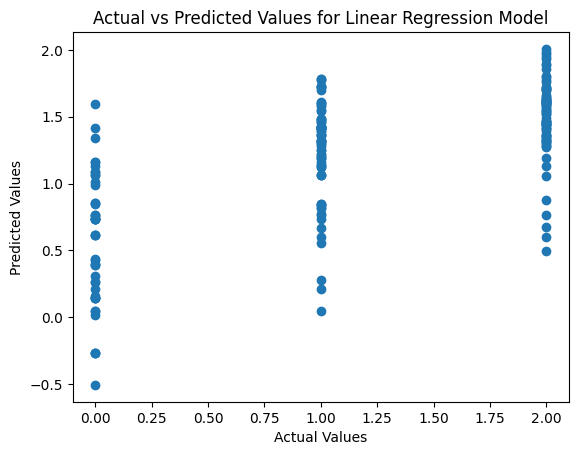

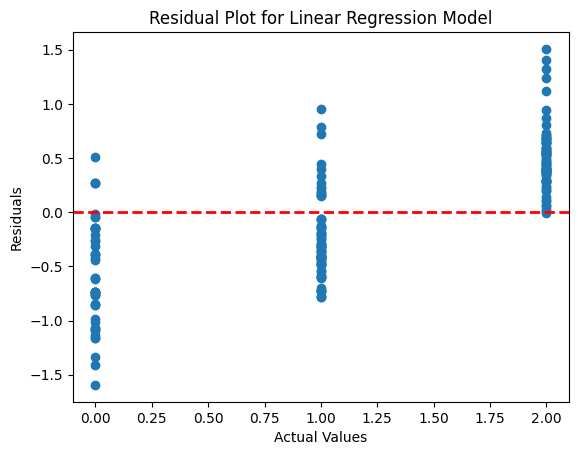

In [34]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Linear Regression Model")
plt.show()

residuals = y_test - Y_pred

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression Model")
plt.show()

In [35]:
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

X_train_logistic = pd.DataFrame(X_train)
X_train_logistic['y'] = y_train
X_train_logistic

,Age,upper_blood_pressure,lower_blood_pressure,blood_sugar,BodyTemp,HeartRate,y
847,30,120,80,9.0,101.0,76,1
332,23,130,70,6.9,98.0,70,1
707,32,120,90,6.9,98.0,70,1
218,31,120,60,6.1,98.0,76,1
425,35,100,60,15.0,98.0,80,0
...,...,...,...,...,...,...,...
106,50,140,90,15.0,98.0,90,0
270,22,120,90,7.0,98.0,82,2
860,17,90,63,6.9,101.0,70,1
435,65,130,80,15.0,98.0,86,0


In [36]:
X_train_logistic['y']

847    1
332    1
707    1
218    1
425    0
      ..
106    0
270    2
860    1
435    0
102    0
Name: y, Length: 811, dtype: int64

In [38]:
from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

learning_rate = 0.1
n_iter = 500
ws,bs = [],[]
encoder = LabelBinarizer()
y_oh = encoder.fit_transform(y)
y = X_train_logistic['y']

predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sig: -(y * np.log(sig))+(1-y * np.log(1-sig)).mean()
# dldw = lambda x, y, sig: (np.reshape(sig-y,(x.shape[0],1))*x).mean(axis = 0)
# dldw = lambda x, y, sig: (np.reshape(sig - y, (x.shape[0], 1)) * x).mean(axis=0)
# dldb = lambda y, sig: (sig-y).mean(axis = 0)
dldw = lambda x, y, sig: np.dot((np.reshape(sig - X_train_logistic['y'], (1, -1))), x).mean(axis=0)
dldb = lambda y, sig: np.mean(np.reshape(sig - y, (1, -1)))
update = lambda w, grad, lr: w - (grad * lr)

for c in range(len(Counter(y))):
    b = 0
    w = np.zeros(X_train.shape[1])
    for i in range(n_iter):
        yhat = predict(X_train, w, b)
        sig = sigmoid(yhat)
        grad_w = dldw(X_train, y_oh[:, c], sig)
        grad_b = dldb(y_oh[:, c], sig)
        w = update(w, grad_w, learning_rate)
        
        # Update bias without broadcasting
        b -= np.mean(grad_b) * learning_rate
        
    ws.append(w)
    bs.append(b)

In [39]:
sigs = []
for c in range(len(Counter(y))):
    yhat = predict(X_test,ws[c],bs[c])
    sig = sigmoid(yhat)
    sigs.append(sig)
y_pred = np.argmax(sigs,axis = 0)

In [40]:
classRep = classification_report(y_test,y_pred)
print(classRep)

              precision    recall  f1-score   support

           0       0.23      1.00      0.38        47
           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00        80

    accuracy                           0.23       203
   macro avg       0.08      0.33      0.13       203
weighted avg       0.05      0.23      0.09       203



D:\installed softwares\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\installed softwares\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\installed softwares\python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Logistic Regression using scikit-learn
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6600985221674877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        47
           1       0.63      0.34      0.44        76
           2       0.61      0.88      0.72        80

    accuracy                           0.66       203
   macro avg       0.68      0.68      0.66       203
weighted avg       0.66      0.66      0.64       203



D:\installed softwares\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Make a copy of the DataFrame
df_kmeans = X_train_logistic.copy()

# Remove the last column
df_kmeans = df_kmeans.iloc[:, :-1]

# Convert DataFrame to NumPy array
kmeans_training_array = df_kmeans.values
print(kmeans_training_array.ndim)

print(kmeans_training_array)

2
[[ 30.  120.   80.    9.  101.   76. ]
 [ 23.  130.   70.    6.9  98.   70. ]
 [ 32.  120.   90.    6.9  98.   70. ]
 ...
 [ 17.   90.   63.    6.9 101.   70. ]
 [ 65.  130.   80.   15.   98.   86. ]
 [ 48.  140.   90.   15.   98.   90. ]]


In [43]:
from sklearn.cluster import KMeans

# Make a copy of the DataFrame
df_kmeans = X_train_logistic.copy()

# Remove the last column
df_kmeans = df_kmeans.iloc[:, :-1]

# Convert DataFrame to NumPy array
kmeans_training_array = df_kmeans.values

# Normalize data (optional but recommended for k-means)
kmeans_training_array = (kmeans_training_array - np.mean(kmeans_training_array, axis=0)) / np.std(kmeans_training_array, axis=0)

# Set the number of clusters (k)
k = 3

# Create KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(kmeans_training_array)

# Get cluster labels for each data point
labels = kmeans.labels_

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Print the cluster labels and centroids
print("Cluster Labels:", labels)
print("Centroids:", centroids)


D:\installed softwares\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels: [1 1 1 1 2 1 1 0 1 2 1 1 2 1 2 1 1 0 0 1 2 2 1 1 2 0 1 1 1 2 1 0 1 1 1 2 2
 2 1 2 1 1 0 1 2 1 1 1 0 2 2 1 2 2 0 0 0 2 1 2 1 2 0 1 1 2 1 1 2 1 1 0 1 2
 2 0 1 2 2 1 1 2 2 0 2 0 1 2 1 1 1 1 1 0 1 2 2 0 1 1 0 1 0 0 2 2 1 2 2 2 0
 2 0 1 2 1 1 1 2 1 1 0 1 1 0 1 0 2 1 1 2 2 0 1 2 2 0 1 2 0 1 2 1 2 1 0 0 2
 1 2 1 1 1 1 1 1 1 0 2 1 2 0 0 0 2 2 1 0 2 1 2 2 1 1 1 2 1 2 1 1 0 1 2 1 0
 1 1 1 1 2 0 1 0 2 2 1 0 1 2 2 1 2 1 2 1 1 2 0 0 1 1 1 1 2 1 2 1 0 1 2 1 2
 2 2 2 1 2 2 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 2 0 1 0 0 1 2 1 2 1 0 1
 1 1 1 0 2 0 1 2 2 1 2 0 1 2 1 1 0 0 0 1 2 1 0 0 2 1 1 2 1 1 2 0 2 1 1 0 1
 2 1 1 1 1 2 0 0 2 0 2 1 1 0 1 1 1 1 2 1 1 1 1 0 1 2 1 1 2 1 0 1 1 2 1 1 1
 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 0 1 1 2 1 1 1 0 1 1 1 1 2 1 0 0
 1 2 1 2 1 0 0 0 1 2 1 1 2 2 1 1 2 0 2 2 1 2 2 1 2 1 1 0 1 1 2 1 2 2 1 1 0
 1 0 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 0 1 1 0 0 2 0 1 2 1 1 1 2 1 1 1 2 1 1
 2 2 2 1 1 1 0 0 1 1 1 2 1 2 1 1 1 0 1 1 1 2 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2
 0 1 1 1 

In [44]:
from sklearn.metrics import silhouette_score

# Assuming you have your data and labels
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_train_logistic)

silhouette_avg = silhouette_score(X_train_logistic, labels)
print("Silhouette Score:", silhouette_avg)

from sklearn.cluster import KMeans

# Assuming you have your data in 'data'
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_logistic)

inertia = kmeans.inertia_
print("Inertia:", inertia)

Silhouette Score: 0.3777456105549888


D:\installed softwares\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\installed softwares\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 238497.8420204849


In [45]:
y

847    1
332    1
707    1
218    1
425    0
      ..
106    0
270    2
860    1
435    0
102    0
Name: y, Length: 811, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Make a copy of the DataFrame
df_svm = X_train_logistic.copy()

# Remove the last column
df_svm = df_svm.iloc[:, :-1]

# Convert DataFrame to NumPy array
svm_training_array = df_svm.values

# Normalize data (optional but recommended for SVM)
svm_training_array = (svm_training_array - np.mean(svm_training_array, axis=0)) / np.std(svm_training_array, axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(svm_training_array, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6196319018404908
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        44
           1       0.42      0.32      0.37        53
           2       0.64      0.73      0.68        66

    accuracy                           0.62       163
   macro avg       0.60      0.62      0.61       163
weighted avg       0.60      0.62      0.61       163

